In [1]:
!pip install chart_studio
!pip install plotly --upgrade

Requirement already up-to-date: plotly in /Users/Alex-Reyes/opt/anaconda3/lib/python3.8/site-packages (4.11.0)


In [2]:
import chart_studio
chart_studio.tools.set_credentials_file(username='nakozo97', api_key='JlYqIEa24e2LnZPOL59n')

In [3]:
import geopandas as gp
df = gp.read_file('Resources/cb_2018_us_zcta510_500k.shp')

In [4]:
df.tail()

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
33139,10983,8600000US10983,10983,5267037,16676,"POLYGON ((-73.96564099999999 41.027873, -73.96..."
33140,50460,8600000US50460,50460,93166133,0,"POLYGON ((-92.806293 43.230259, -92.8035419999..."
33141,40870,8600000US40870,40870,18226594,201441,"POLYGON ((-83.19264199999999 36.916502, -83.19..."
33142,40914,8600000US40914,40914,32269366,419039,"POLYGON ((-83.62747899999999 37.074189, -83.62..."
33143,52750,8600000US52750,52750,77963307,472441,"POLYGON ((-90.44672299999999 41.891512, -90.44..."


In [5]:
x,y=df['geometry'][3].exterior.xy

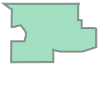

In [6]:
df['geometry'][24]

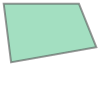

In [7]:
df['geometry'][24].simplify(0.2)

In [8]:
print(df['geometry'][24].type)

Polygon


In [9]:
len(df['geometry'][24])

TypeError: object of type 'Polygon' has no len()

In [ ]:
df['geometry'][18].exterior.xy[1][0]

In [ ]:
df['geometry'][24].centroid.xy

In [ ]:
import chart_studio.plotly as py
import plotly.graph_objects as go

In [ ]:
layout = dict(
    hovermode = 'closest',
    xaxis = dict(
        autorange = False,
        range = [-125, -65],
        showgrid = False,
        zeroline = False,
        fixedrange = True
    ),
    yaxis = dict(
        autorange = False,
        range = [25, 49],
        showgrid = False,
        zeroline = False,
        fixedrange = True
    ),
    margin = dict(
        t=20,
        b=20,
        r=20,
        l=20
    ),
    width = 1100,
    height = 650,
    dragmode = 'select'
)

In [ ]:
plot_data = []
for index,row in df.iterrows():
    if df['geometry'][index].type == 'Polygon':
        x,y = row.geometry.exterior.xy
        c_x,c_y = row.geometry.centroid.xy
    elif df['geometry'][index].type == 'MultiPolygon':
        x = [poly.exterior.xy[0] for poly in df['geometry'][index]]
        y = [poly.exterior.xy[1] for poly in df['geometry'][index]]
        x_c = [poly.centroid.xy[0] for poly in df['geometry'][index]]
        y_c = [poly.centroid.xy[1] for poly in df['geometry'][index]]        
    else: 
        print('stop')
    county_outline = dict(
            type = 'choropleth',
            showlegend = False,
            legendgroup = "shapes",
            line = dict(color='black', width=1),
            x=x,
            y=y,
            fill='toself',
            fillcolor = 'purple',
            hoverinfo='none'
    )
    hover_point = dict(
            type = 'choropleth',
            showlegend = False,
            legendgroup = "centroids",
#             name = row.NAME,
            marker = dict(size=2),
#             x=c_x,
#             y=c_y,
            fill='toself',
            fillcolor = 'purple'            
    )
    plot_data.append(county_outline)
    plot_data.append(hover_point)


In [ ]:
len(plot_data)

In [ ]:
fig = dict(data=plot_data, layout=layout)
py.plot(fig, filename='Resources/cb_2018_us_zcta510_500k.shp')